### Time Resolved Photoluminescence Modeling

In a TRPL experiment the sample is hitted by a laser pulse of a very short time (picoseconds) which generates a first excess carrier density *n(0)*. This value decays in time due to charge recombination processes happening in the material.
The overall decay of the excess carrier density results in a exponential decay curve that is normally fitted with a multiple exponential. But the main limitation is that lifetime constants are extrapoleted by these fitting curve which do not explain precisely the physical processes which play simultaneously a role in the decay dynamics. 

For these reasons, we want to analyze in details the processes of generation and recombination of charges that happen after excitation to find the best and most precise way to get information on carrier recombination processes.

We start from the continuity equation which describe the number of photogenerated excess carrier in time:

$\frac{\delta(n)}{\delta(t)} = - R_1(z,t) - R_2(z,t)$

* $R_1$ is the recombination constant associated with Shockley Read Hall (SRH) recombination

$R_1 = \frac{(n_0 + n)(p_0 + p) - n_i^2}{(n_0 + n) + (p_0 + p) + 2n_icosh\frac{(E_i - E_t)}{kT}} \sigma \nu_{th} N_t$

* $R_2$ is the recombination rate associated with the band-to-band recombination (bimolecular process)


LLI
$R_2(z, t) = k_2[p(p_0)]$

HLI
$R_2(z, t) = k_2[p^2]$

The Auger recombination is negligible under the normal working condition of solar cells (below an excess carrier density of $10^{17} cm^{−3}$ )

* **Low Level Injection regime: $n=p<<p_0$**

Under low injection level (LLI) conditions, the photocarrier
density *n* is much lower than the equilibrium density of the
majority carriers; $R_1$ can be expressed as a linear function of the
photocarrier density *n(z,t)*. 
Approximation:

$R_1 = k_1n(z,t)$

Where $k_1$ is the SRH recombination frequency(?=constant?)

Approximation of $R_2$:

$R_2 = k_2p_0p$

**Continuity equation at LLI**

$\frac{\delta(n)}{\delta(t)} = -(k_1 + k_2p_0)p$

$k_2p_0$ is non-negligible only if the
absorbing layer is highly doped 
($k1 = 10^7 s^{−1}$ and $k_2 = 10^{−10} \frac{cm^3}{s}, p_0 > 10^{17} cm^{−3}$). 
Therefore, under LLI conditions and low doping concentration, the decay of the photogenerated carriers is mainly controlled by the SRH recombination rate $k_1$

**Continuity equation at HLI**

$\frac{\delta(n)}{\delta(t)} = -(k'_1 + k_2p_0)p - k_2p^2$  

where $k'_1$ 

Approximation of the existance of only deep level traps:

**LLI** : $\frac{\delta(n)}{\delta(t)} = -(k_1 + k_2p_0)p - k_2p^2$ 

**HLI** : $\frac{\delta(n)}{\delta(t)} = -(\frac{k_1}{2} + k_2p_0)p - k_2p^2$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import skewnorm
from scipy.stats import exponnorm
from customplotting.general import plot_xy, save_fig
from functions import *

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

In [3]:
# HLI continuity equation: dn/dt with k2, n0 as a constant and k1 as a variable
def photoluminescence_HLI(t, k1):
    def model(n, t):
        k2 = 2e-10
        dndt = -(k2*(n**2) + k1*n)
        return dndt
    n0 = np.tile(np.power(10, 14), 50)
    n = odeint(model, n0, t)
    k2 = 2e-10
    pl_HLI = k2 * (n**2)
    return pl_HLI

In [4]:
# LLI continuity equation: dn/dt with k2, n0 as a constant and k1 as a variable
def photoluminescence_LLI(t, k1):
    def model(n, t):
        k2 = 2e-10
        dndt = -(k2*(n**2) + k1*n)
        return dndt
    n0 = np.tile(np.power(10, 14), 50)
    n = odeint(model, n0, t)
    k2 = 2e-10
    p0 = 3e15
    pl_LLI = k2 * n* p0
    return pl_LLI

In [5]:
# photoluminescence database from k1 from 1e5 to 1e7 and time from 0 to 1000ns
pl_HLI = photoluminescence_HLI(t = np.linspace(0,10000, 5000)*1e-9, k1= np.logspace(6, 7, 50))
pl_HLI

array([[2.00000000e+18, 2.00000000e+18, 2.00000000e+18, ...,
        2.00000000e+18, 2.00000000e+18, 2.00000000e+18],
       [1.99185516e+18, 1.99147179e+18, 1.99107006e+18, ...,
        1.92831909e+18, 1.92494323e+18, 1.92141130e+18],
       [1.98374381e+18, 1.98298029e+18, 1.98218034e+18, ...,
        1.85920993e+18, 1.85270602e+18, 1.84591361e+18],
       ...,
       [3.99407156e+09, 1.52918315e+09, 5.58945355e+08, ...,
        1.77746634e-46, 1.58799456e-45, 1.47314550e-45],
       [3.97812398e+09, 1.52278426e+09, 5.56494156e+08, ...,
        2.07475164e-46, 1.43832289e-45, 3.84874755e-45],
       [3.96224008e+09, 1.51641215e+09, 5.54053706e+08, ...,
        2.37917690e-46, 1.26836482e-45, 7.48218435e-45]])

In [6]:
pl_HLI.shape

(5000, 50)

In [7]:
#x values of time
t = np.linspace(0,10000, 5000)*1e-9
t

array([0.00000000e+00, 2.00040008e-09, 4.00080016e-09, ...,
       9.99599920e-06, 9.99799960e-06, 1.00000000e-05])

In [8]:
#weighted sum of photoluminescence data
pl_HLI_sum = pl_HLI.sum(axis=0)
pl_HLI_sum.size

50

In [9]:
#weighted average og the photoluminescence data
pl_HLI_avg = np.average(pl_HLI, weights=pl_HLI_sum, axis=-1)
pl_HLI_avg.size

5000

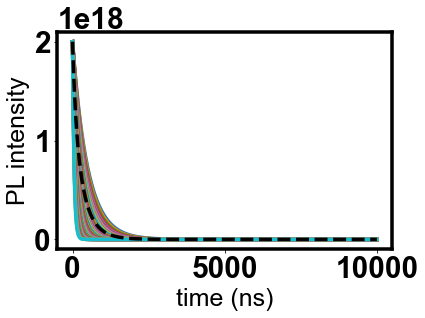

In [10]:

#plot of exponential decay of photoluminescence
plt.plot(t*1e9, pl_HLI)
plt.plot(t*1e9, pl_HLI_avg,'k--', label="Average")
plt.xlabel('time (ns)', fontsize=25)
plt.ylabel('PL intensity', fontsize= 25)
plt.show()

In [ ]:
#streched exponential fitting of the average PL exponential decay
stretched_exp = stretch_exp_fit(pl_HLI_avg/np.max(pl_HLI_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

In [ ]:
#double exponential fitting of the average PL exponential decay
double_exp = double_exp_fit(pl_HLI_avg/np.max(pl_HLI_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

In [ ]:
#triple exponential fitting of the average PL exponential decay
triple_exp = triple_exp_fit(pl_HLI_avg/np.max(pl_HLI_avg), t)
print("tau1 (ns) = "+str(triple_exp[0]*1e9))
print("a1 = "+str(triple_exp[1]))
print("tau2 (ns) = "+str(triple_exp[2]*1e9))
print("a2 = "+str(triple_exp[3]))
print("tau3 (ns) = "+str(triple_exp[4]*1e9))
print("a3 (ns) = "+str(triple_exp[5]))
print("avg. tau (ns) = "+str(triple_exp[6]*1e9))

In [ ]:
#single exponential fitting of the average PL exponential decay
single_exp = single_exp_fit(pl_HLI_avg/np.max(pl_HLI_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))

In [ ]:
# plot fitting functions of the average PL exponential decay
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_HLI_avg/np.max(pl_HLI_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)




### Calculation of theoretical tau  
$I = I_0e^{(\frac{-t}{\tau})}$ when t = $\tau$ and $I = \frac{I_0}{e}$

In [ ]:
PL_e_HLI = np.max(pl_HLI, axis=0)/np.e
PL_e_HLI.size

In [ ]:
#function to calulate the index of the PL/e values in the "pl" database by looking at the nearest neighbor of the "PL_e_values" inside "pl"
def find_idx(array, value):
    return (np.abs(array - value)).argmin()

In [ ]:
# index of PL data calculated considering each array inside the array of pl singularly
time_PL_HLI = np.array([])
for ix, i in enumerate(PL_e_HLI):
    b = find_idx(pl_HLI[:, ix], i)
    time_PL_HLI = np.append(time_PL_HLI, b)
time_PL_HLI

In [ ]:
# array of lifetime at which PL=PL0/e
lifetime_HLI = np.array([])
for i in time_PL_HLI:
    lifetime_HLI = np.append(lifetime_HLI, t[int(i)]) 
lifetime_HLI*1e9

In [ ]:
avg_lifetime_HLI = np.average(lifetime_HLI, weights=pl_HLI_sum, axis=-1)
avg_lifetime_HLI*1e9

In [ ]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure()
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("Theoretical lifetime", avg_lifetime_HLI*1e9)
plt.barh("Stretched Exp $\tau$", stretched_exp[3]*1e9)
plt.barh("Double Exp $\tau^{avg}$", double_exp[4]*1e9)
plt.barh("Double Exp $\tau^{2}$", double_exp[2]*1e9)
plt.barh("Single Exp $\tau$", single_exp[2]*1e9)
#plt.barh("Triple Exp $\tau^{3}$", triple_exp[4]*1e9)
#plt.barh("Triple Exp $\tau^{avg}$", triple_exp[6]*1e9)

In [ ]:
plt.figure()
plt.barh("Theoretical lifetime", avg_lifetime_HLI*1e9)
plt.barh("Stretched Exp", stretched_exp[3]*1e9)
plt.barh("Double Exp Avg Tau", double_exp[4]*1e9)

### Low Level Injection 

In [ ]:
#creation of LLI PL decay curves and average decay curve

# photoluminescence database from k1 from 1e5 to 1e7 and time from 0 to 1000ns
pl_LLI = photoluminescence_LLI(t = np.linspace(0,10000, 5000)*1e-9, k1= np.logspace(6, 7, 50))
pl_LLI

#weighted sum of photoluminescence data
pl_LLI_sum = pl_LLI.sum(axis=0)
pl_LLI_sum

#weighted average og the photoluminescence data
pl_LLI_avg = np.average(pl_LLI, weights=pl_LLI_sum, axis=-1)
pl_LLI_avg

In [ ]:
#plot of exponential decay of photoluminescence
plt.plot(t*1e9, pl_LLI)
plt.plot(t*1e9, pl_LLI_avg,'k--', label="Average")
plt.xlabel('time (ns)', fontsize =25)
plt.ylabel('PL intensity', fontsize= 25)
plt.show()

In [ ]:
#streched exponential fitting of the average PL exponential decay
stretched_exp = stretch_exp_fit(pl_LLI_avg/np.max(pl_LLI_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

In [ ]:
#double exponential fitting of the average PL exponential decay
double_exp = double_exp_fit(pl_LLI_avg/np.max(pl_LLI_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

In [ ]:
#triple exponential fitting of the average PL exponential decay
triple_exp = triple_exp_fit(pl_LLI_avg/np.max(pl_LLI_avg), t)
print("tau1 (ns) = "+str(triple_exp[0]*1e9))
print("a1 = "+str(triple_exp[1]))
print("tau2 (ns) = "+str(triple_exp[2]*1e9))
print("a2 = "+str(triple_exp[3]))
print("tau3 (ns) = "+str(triple_exp[4]*1e9))
print("a3 (ns) = "+str(triple_exp[5]))
print("avg. tau (ns) = "+str(triple_exp[6]*1e9))

In [ ]:
#single exponential fitting of the average PL exponential decay
single_exp = single_exp_fit(pl_LLI_avg/np.max(pl_LLI_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))

In [ ]:
# plot fitting functions of the average PL exponential decay
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_LLI_avg/np.max(pl_LLI_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

In [ ]:
#Mathematical derivation of theoretical average lifetime from weighted average of each time at which I = I0/e

#photoluminescence maximum from LLI regime divided by e
PL_e_LLI = np.max(pl_LLI, axis=0)/np.e
PL_e_LLI.size

# index of LLI PL data calculated considering each array inside the array of pl singularly
time_PL_LLI = np.array([])
for ix, i in enumerate(PL_e_LLI):
    b = find_idx(pl_LLI[:, ix], i)
    time_PL_LLI = np.append(time_PL_LLI, b)
time_PL_LLI

# array of lifetime at which PL=PL0/e at LLI
lifetime_LLI = np.array([])
for i in time_PL_LLI:
    lifetime_LLI = np.append(lifetime_LLI, t[int(i)]) 
lifetime_LLI*1e9

#weighted average of calculate lifetimes with pl_sum weights
avg_lifetime_LLI = np.average(lifetime_LLI, weights=pl_LLI_sum, axis=-1)
avg_lifetime_LLI*1e9

In [ ]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure()
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("Theoretical lifetime", avg_lifetime_LLI*1e9)
plt.barh("Stretched Exp $\tau$", stretched_exp[3]*1e9)
plt.barh("Double Exp $\tau^{avg}$", double_exp[4]*1e9)
plt.barh("Double Exp $\tau^{2}$", double_exp[2]*1e9)
plt.barh("Single Exp $\tau$", single_exp[2]*1e9)
#plt.barh("Triple Exp $\tau^{3}$", triple_exp[4]*1e9)
#plt.barh("Triple Exp $\tau^{avg}$", triple_exp[6]*1e9)

In [ ]:
plt.figure()
plt.barh("Theoretical lifetime", avg_lifetime_LLI*1e9)
plt.barh("Stretched Exp", stretched_exp[3]*1e9)
plt.barh("Double Exp Avg Tau", double_exp[4]*1e9)

## Skew-Normal Distribution of k1 with a = 2

The Skew-Normal distribution is an extension of the normal (Gaussian) probability distribution, allowing for the presence of skewness.
The component $\alpha$ is what gives the distribution its "skewness" which regulates the shape of the density function. 

* when $\alpha=0$, the skewness vanishes, and we obtain the standard Normal density
* when $\alpha$ increases in absolute value , the skewness of the distribution increases.
* when  $\alpha\to\infty$ the density converges to the so-called half-normal (or folded normal) density function
* when the sign of $\alpha$ changes, the density is reflected on the opposite side of the vertical axis.

<a href="{http://azzalini.stat.unipd.it/SN/Intro/intro.html}">{Ref}</a>

For a random variable $x$ which has a standard skew normal distribution with skewness parameter $\alpha$, its probability density function is given by:


$f(x) = 2 \phi(x) \Phi(\alpha x)$

with :

$\phi(x)={\frac {1}{\sqrt {2\pi }}}\;e^{-x^{2}/2}$
$\qquad \Phi(\alpha x) = \int_{-\infty}^{\alpha x}\phi(t) dt$

Simple continuity equation considering just the radiative (k2) and defect-assisted non-radiative recombination (k1)
* k1 = skewed distribution with maximum at 1e6 ns and a size of 50 data points
* k2 = 2e-10 cm^3 s^-1
* n0 = 1e14
* t = 0 to 1000 ns

In [ ]:
# skewed gaussian distribution of k1 values
skew = skewnorm.rvs(a = 2, loc = 1e6, scale=1e7, size=50)

In [ ]:
plt.figure()
plt.tick_params(length=8)
plt.hist(skew)
plt.xlabel("K1 values (s-1)")
plt.xscale("log")

### SN of k1 in HLI regime

In [ ]:
# PL decay curves for each k1 value 
pl_skew = photoluminescence_HLI(k1= skew, t=np.linspace(0,10000, 5000)*1e-9)
pl_skew

# weight of each decay curve
skew_sum = pl_skew.sum(axis=0)
skew_sum.size


# weighted average curve which is most likely the one we end up seeing as overall decay
pl_skew_avg = np.average(pl_skew, weights=skew_sum, axis=-1)
pl_skew_avg.size

In [ ]:
#plot of all exponetial decay for each k1 and average curve
plt.plot(t*1e9, pl_skew)
plt.plot(t*1e9, pl_skew_avg,'k--', label="Average")
plt.xlabel('time (ns)', fontsize=12)
plt.ylabel('PL intensity', fontsize=12)
plt.show()

In [ ]:
stretched_exp_skew = stretch_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau_c (ns) = "+str(stretched_exp_skew[0]*1e9))
print("Beta = "+str(stretched_exp_skew[1]))
print("avg. tau (ns) = "+str(stretched_exp_skew[3]*1e9))

In [ ]:
double_exp_skew = double_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(double_exp_skew[0]*1e9))
print("a1 = "+str(double_exp_skew[1]))
print("tau2 (ns) = "+str(double_exp_skew[2]*1e9))
print("a2 = "+str(double_exp_skew[3]))
print("avg. tau (ns) = "+str(double_exp_skew[4]*1e9))

In [ ]:
triple_exp_skew = triple_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(triple_exp_skew[0]*1e9))
print("a1 = "+str(triple_exp_skew[1]))
print("tau2 (ns) = "+str(triple_exp_skew[2]*1e9))
print("a2 = "+str(triple_exp_skew[3]))
print("tau3 (ns) = "+str(triple_exp_skew[4]*1e9))
print("a3 (ns) = "+str(triple_exp_skew[5]))
print("avg. tau (ns) = "+str(triple_exp_skew[6]*1e9))

In [ ]:
single_exp_skew = single_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau (ns) = "+str(single_exp_skew[0]*1e9))
print("a = "+str(single_exp_skew[1]))
print("avg. tau (ns) = "+str(single_exp_skew[2]*1e9))

In [ ]:
# plot average curve and multiple exponential fitting curves
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp_skew[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp_skew[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp_skew[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp_skew[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

In [ ]:
#Mathematical deriation of lifetime from average curve knowing at $\tau$ : $I = \frac{I_0}{e}$

#photoluminescence maximum divided by e
PL_e_skew = np.max(pl_skew, axis=0)/np.e
PL_e_skew.size

# index of PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[ix, :], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9

# index of LLI PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[:, ix], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9


lifetime_skew_avg = np.average(lifetime_skew, weights= skew_sum, axis=-1)
lifetime_skew_avg*1e9

In [ ]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure()
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("Theoretical $\tau$", lifetime_skew_avg*1e9)
plt.barh("Stretched Exp $\tau$", stretched_exp_skew[3]*1e9)
plt.barh("Double Exp $\tau^{avg}$", double_exp_skew[4]*1e9)
plt.barh("Double Exp $\tau^{2}$", double_exp_skew[2]*1e9)
plt.barh("Single Exp $\tau$", single_exp_skew[2]*1e9)
#plt.barh("Triple Exp $\tau^{3}$", triple_exp_skew[4]*1e9)
#plt.barh("Triple Exp $\tau^{avg}$", triple_exp_skew[6]*1e9)

In [ ]:
plt.figure()
plt.barh("Theoretical $\tau$", lifetime_skew_avg*1e9)
plt.barh("Stretched Exp $\tau$", stretched_exp_skew[3]*1e9)
plt.barh("Double Exp $\tau^{avg}$", double_exp_skew[4]*1e9)

### SN of k1 in LLI regime

In [ ]:
# PL decay curves for each k1 value 
pl_skew = photoluminescence_LLI(k1= skew, t=np.linspace(0,10000, 5000)*1e-9)
pl_skew

# weight of each decay curve
skew_sum = pl_skew.sum(axis=0)
skew_sum.size


# weighted average curve which is most likely the one we end up seeing as overall decay
pl_skew_avg = np.average(pl_skew, weights=skew_sum, axis=-1)
pl_skew_avg.size

In [ ]:
#plot of all exponetial decay for each k1 and average curve
plt.plot(t*1e9, pl_skew)
plt.plot(t*1e9, pl_skew_avg,'k--', label="Average")
plt.xlabel('time (ns)', fontsize=12)
plt.ylabel('PL intensity', fontsize=12)
plt.show()

In [ ]:
stretched_exp_skew = stretch_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau_c (ns) = "+str(stretched_exp_skew[0]*1e9))
print("Beta = "+str(stretched_exp_skew[1]))
print("avg. tau (ns) = "+str(stretched_exp_skew[3]*1e9))

In [ ]:
double_exp_skew = double_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(double_exp_skew[0]*1e9))
print("a1 = "+str(double_exp_skew[1]))
print("tau2 (ns) = "+str(double_exp_skew[2]*1e9))
print("a2 = "+str(double_exp_skew[3]))
print("avg. tau (ns) = "+str(double_exp_skew[4]*1e9))

In [ ]:
triple_exp_skew = triple_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(triple_exp_skew[0]*1e9))
print("a1 = "+str(triple_exp_skew[1]))
print("tau2 (ns) = "+str(triple_exp_skew[2]*1e9))
print("a2 = "+str(triple_exp_skew[3]))
print("tau3 (ns) = "+str(triple_exp_skew[4]*1e9))
print("a3 (ns) = "+str(triple_exp_skew[5]))
print("avg. tau (ns) = "+str(triple_exp_skew[6]*1e9))

In [ ]:
single_exp_skew = single_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau (ns) = "+str(single_exp_skew[0]*1e9))
print("a = "+str(single_exp_skew[1]))
print("avg. tau (ns) = "+str(single_exp_skew[2]*1e9))

In [ ]:
# plot average curve and multiple exponential fitting curves
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp_skew[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp_skew[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp_skew[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp_skew[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

In [ ]:
#Mathematical deriation of lifetime from average curve knowing at $\tau$ : $I = \frac{I_0}{e}$

#photoluminescence maximum divided by e
PL_e_skew = np.max(pl_skew, axis=0)/np.e
PL_e_skew.size

# index of PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[ix, :], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9

# index of LLI PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[:, ix], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9


lifetime_skew_avg = np.average(lifetime_skew, weights= skew_sum, axis=-1)
lifetime_skew_avg*1e9

In [ ]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure()
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("Theoretical $\tau$", lifetime_skew_avg*1e9)
plt.barh("Stretched Exp $\tau$", stretched_exp_skew[3]*1e9)
plt.barh("Double Exp $\tau^{avg}$", double_exp_skew[4]*1e9)
plt.barh("Double Exp $\tau^{2}$", double_exp_skew[2]*1e9)
plt.barh("Single Exp $\tau$", single_exp_skew[2]*1e9)
#plt.barh("Triple Exp $\tau^{3}$", triple_exp_skew[4]*1e9)
#plt.barh("Triple Exp $\tau^{avg}$", triple_exp_skew[6]*1e9)

In [ ]:
plt.figure()
plt.barh("Theoretical $\tau$", lifetime_skew_avg*1e9)
plt.barh("Stretched Exp $\tau$", stretched_exp_skew[3]*1e9)
plt.barh("Double Exp $\tau^{avg}$", double_exp_skew[4]*1e9)

## Skewed distribution of k1 with a = 5

In [ ]:
# skewed gaussian distribution of k1 values
skew = skewnorm.rvs(a = 5, loc = 1e6, scale=1e7, size=50)

In [ ]:
plt.figure()
plt.tick_params(length=8)
plt.hist(skew)
plt.xlabel("K1 values (s-1)")
plt.xscale("log")

### SN of k1 in HLI regime

In [ ]:
# PL decay curves for each k1 value 
pl_skew = photoluminescence_HLI(k1= skew, t=np.linspace(0,10000, 5000)*1e-9)
pl_skew

# weight of each decay curve
skew_sum = pl_skew.sum(axis=0)
skew_sum.size


# weighted average curve which is most likely the one we end up seeing as overall decay
pl_skew_avg = np.average(pl_skew, weights=skew_sum, axis=-1)
pl_skew_avg.size

In [ ]:
#plot of all exponetial decay for each k1 and average curve
plt.plot(t*1e9, pl_skew)
plt.plot(t*1e9, pl_skew_avg,'k--', label="Average")
plt.xlabel('time (ns)', fontsize=12)
plt.ylabel('PL intensity', fontsize=12)
plt.show()

In [ ]:
stretched_exp_skew = stretch_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau_c (ns) = "+str(stretched_exp_skew[0]*1e9))
print("Beta = "+str(stretched_exp_skew[1]))
print("avg. tau (ns) = "+str(stretched_exp_skew[3]*1e9))

In [ ]:
double_exp_skew = double_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(double_exp_skew[0]*1e9))
print("a1 = "+str(double_exp_skew[1]))
print("tau2 (ns) = "+str(double_exp_skew[2]*1e9))
print("a2 = "+str(double_exp_skew[3]))
print("avg. tau (ns) = "+str(double_exp_skew[4]*1e9))

In [ ]:
triple_exp_skew = triple_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(triple_exp_skew[0]*1e9))
print("a1 = "+str(triple_exp_skew[1]))
print("tau2 (ns) = "+str(triple_exp_skew[2]*1e9))
print("a2 = "+str(triple_exp_skew[3]))
print("tau3 (ns) = "+str(triple_exp_skew[4]*1e9))
print("a3 (ns) = "+str(triple_exp_skew[5]))
print("avg. tau (ns) = "+str(triple_exp_skew[6]*1e9))

In [ ]:
single_exp_skew = single_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau (ns) = "+str(single_exp_skew[0]*1e9))
print("a = "+str(single_exp_skew[1]))
print("avg. tau (ns) = "+str(single_exp_skew[2]*1e9))

In [ ]:
# plot average curve and multiple exponential fitting curves
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp_skew[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp_skew[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp_skew[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp_skew[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

In [ ]:
#Mathematical deriation of lifetime from average curve knowing at $\tau$ : $I = \frac{I_0}{e}$

#photoluminescence maximum divided by e
PL_e_skew = np.max(pl_skew, axis=0)/np.e
PL_e_skew.size

# index of PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[ix, :], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9

# index of LLI PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[:, ix], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9


lifetime_skew_avg = np.average(lifetime_skew, weights= skew_sum, axis=-1)
lifetime_skew_avg*1e9

In [ ]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure()
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("Theoretical $\tau$", lifetime_skew_avg*1e9)
plt.barh("Stretched Exp $\tau$", stretched_exp_skew[3]*1e9)
plt.barh("Double Exp $\tau^{avg}$", double_exp_skew[4]*1e9)
plt.barh("Double Exp $\tau^{2}$", double_exp_skew[2]*1e9)
plt.barh("Single Exp $\tau$", single_exp_skew[2]*1e9)
#plt.barh("Triple Exp $\tau^{3}$", triple_exp_skew[4]*1e9)
#plt.barh("Triple Exp $\tau^{avg}$", triple_exp_skew[6]*1e9)

In [ ]:
plt.figure()
plt.barh("Theoretical $\tau$", lifetime_skew_avg*1e9)
plt.barh("Stretched Exp $\tau$", stretched_exp_skew[3]*1e9)
plt.barh("Double Exp $\tau^{avg}$", double_exp_skew[4]*1e9)

### SN of k1 in LLI regime

In [ ]:
# PL decay curves for each k1 value 
pl_skew = photoluminescence_LLI(k1= skew, t=np.linspace(0,10000, 5000)*1e-9)
pl_skew

# weight of each decay curve
skew_sum = pl_skew.sum(axis=0)
skew_sum.size


# weighted average curve which is most likely the one we end up seeing as overall decay
pl_skew_avg = np.average(pl_skew, weights=skew_sum, axis=-1)
pl_skew_avg.size

In [ ]:
#plot of all exponetial decay for each k1 and average curve
plt.plot(t*1e9, pl_skew)
plt.plot(t*1e9, pl_skew_avg,'k--', label="Average")
plt.xlabel('time (ns)', fontsize=12)
plt.ylabel('PL intensity', fontsize=12)
plt.show()

In [ ]:
stretched_exp_skew = stretch_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau_c (ns) = "+str(stretched_exp_skew[0]*1e9))
print("Beta = "+str(stretched_exp_skew[1]))
print("avg. tau (ns) = "+str(stretched_exp_skew[3]*1e9))

In [ ]:
double_exp_skew = double_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(double_exp_skew[0]*1e9))
print("a1 = "+str(double_exp_skew[1]))
print("tau2 (ns) = "+str(double_exp_skew[2]*1e9))
print("a2 = "+str(double_exp_skew[3]))
print("avg. tau (ns) = "+str(double_exp_skew[4]*1e9))

In [ ]:
triple_exp_skew = triple_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(triple_exp_skew[0]*1e9))
print("a1 = "+str(triple_exp_skew[1]))
print("tau2 (ns) = "+str(triple_exp_skew[2]*1e9))
print("a2 = "+str(triple_exp_skew[3]))
print("tau3 (ns) = "+str(triple_exp_skew[4]*1e9))
print("a3 (ns) = "+str(triple_exp_skew[5]))
print("avg. tau (ns) = "+str(triple_exp_skew[6]*1e9))

In [ ]:
single_exp_skew = single_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau (ns) = "+str(single_exp_skew[0]*1e9))
print("a = "+str(single_exp_skew[1]))
print("avg. tau (ns) = "+str(single_exp_skew[2]*1e9))

In [ ]:
# plot average curve and multiple exponential fitting curves
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp_skew[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp_skew[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp_skew[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp_skew[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

In [ ]:
#Mathematical deriation of lifetime from average curve knowing at $\tau$ : $I = \frac{I_0}{e}$

#photoluminescence maximum divided by e
PL_e_skew = np.max(pl_skew, axis=0)/np.e
PL_e_skew.size

# index of PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[ix, :], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9

# index of LLI PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[:, ix], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9


lifetime_skew_avg = np.average(lifetime_skew, weights= skew_sum, axis=-1)
lifetime_skew_avg*1e9

In [ ]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure()
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("Theoretical $\tau$", lifetime_skew_avg*1e9)
plt.barh("Stretched Exp $\tau$", stretched_exp_skew[3]*1e9)
plt.barh("Double Exp $\tau^{avg}$", double_exp_skew[4]*1e9)
plt.barh("Double Exp $\tau^{2}$", double_exp_skew[2]*1e9)
plt.barh("Single Exp $\tau$", single_exp_skew[2]*1e9)
#plt.barh("Triple Exp $\tau^{3}$", triple_exp_skew[4]*1e9)
#plt.barh("Triple Exp $\tau^{avg}$", triple_exp_skew[6]*1e9)

In [ ]:
plt.figure()
plt.barh("Theoretical $\tau$", lifetime_skew_avg*1e9)
plt.barh("Stretched Exp $\tau$", stretched_exp_skew[3]*1e9)
plt.barh("Double Exp $\tau^{avg}$", double_exp_skew[4]*1e9)

# Skew Distribution of k1 with a = -5

In [ ]:
# skewed gaussian distribution of k1 values
skew = skewnorm.rvs(a = -5, loc = 1e6, scale=1e7, size=50)

In [ ]:
plt.figure()
plt.tick_params(length=8)
plt.hist(skew)
plt.xlabel("K1 values (s-1)")
plt.xscale("log")

### SN of k1 in HLI regime

In [ ]:
# PL decay curves for each k1 value 
pl_skew = photoluminescence_HLI(k1= skew, t=np.linspace(0,10000, 5000)*1e-9)
pl_skew

# weight of each decay curve
skew_sum = pl_skew.sum(axis=0)
skew_sum.size


# weighted average curve which is most likely the one we end up seeing as overall decay
pl_skew_avg = np.average(pl_skew, weights=skew_sum, axis=-1)
pl_skew_avg.size

In [ ]:
#plot of all exponetial decay for each k1 and average curve
plt.plot(t*1e9, pl_skew)
plt.plot(t*1e9, pl_skew_avg,'k--', label="Average")
plt.xlabel('time (ns)', fontsize=12)
plt.ylabel('PL intensity', fontsize=12)
plt.show()

In [ ]:
stretched_exp_skew = stretch_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau_c (ns) = "+str(stretched_exp_skew[0]*1e9))
print("Beta = "+str(stretched_exp_skew[1]))
print("avg. tau (ns) = "+str(stretched_exp_skew[3]*1e9))

In [ ]:
double_exp_skew = double_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(double_exp_skew[0]*1e9))
print("a1 = "+str(double_exp_skew[1]))
print("tau2 (ns) = "+str(double_exp_skew[2]*1e9))
print("a2 = "+str(double_exp_skew[3]))
print("avg. tau (ns) = "+str(double_exp_skew[4]*1e9))

In [ ]:
triple_exp_skew = triple_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(triple_exp_skew[0]*1e9))
print("a1 = "+str(triple_exp_skew[1]))
print("tau2 (ns) = "+str(triple_exp_skew[2]*1e9))
print("a2 = "+str(triple_exp_skew[3]))
print("tau3 (ns) = "+str(triple_exp_skew[4]*1e9))
print("a3 (ns) = "+str(triple_exp_skew[5]))
print("avg. tau (ns) = "+str(triple_exp_skew[6]*1e9))

In [ ]:
single_exp_skew = single_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau (ns) = "+str(single_exp_skew[0]*1e9))
print("a = "+str(single_exp_skew[1]))
print("avg. tau (ns) = "+str(single_exp_skew[2]*1e9))

In [ ]:
# plot average curve and multiple exponential fitting curves
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp_skew[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp_skew[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp_skew[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp_skew[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

In [ ]:
#Mathematical deriation of lifetime from average curve knowing at $\tau$ : $I = \frac{I_0}{e}$

#photoluminescence maximum divided by e
PL_e_skew = np.max(pl_skew, axis=0)/np.e
PL_e_skew.size

# index of PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[ix, :], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9

# index of LLI PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[:, ix], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9


lifetime_skew_avg = np.average(lifetime_skew, weights= skew_sum, axis=-1)
lifetime_skew_avg*1e9

In [ ]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure()
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("Theoretical $\tau$", lifetime_skew_avg*1e9)
plt.barh("Stretched Exp $\tau$", stretched_exp_skew[3]*1e9)
plt.barh("Double Exp $\tau^{avg}$", double_exp_skew[4]*1e9)
plt.barh("Double Exp $\tau^{2}$", double_exp_skew[2]*1e9)
plt.barh("Single Exp $\tau$", single_exp_skew[2]*1e9)
#plt.barh("Triple Exp $\tau^{3}$", triple_exp_skew[4]*1e9)
#plt.barh("Triple Exp $\tau^{avg}$", triple_exp_skew[6]*1e9)

In [ ]:
plt.figure()
plt.barh("Theoretical $\tau$", lifetime_skew_avg*1e9)
plt.barh("Stretched Exp $\tau$", stretched_exp_skew[3]*1e9)
plt.barh("Double Exp $\tau^{avg}$", double_exp_skew[4]*1e9)

### SN of k1 in LLI regime

In [ ]:
# PL decay curves for each k1 value 
pl_skew = photoluminescence_LLI(k1= skew, t=np.linspace(0,10000, 5000)*1e-9)
pl_skew

# weight of each decay curve
skew_sum = pl_skew.sum(axis=0)
skew_sum.size


# weighted average curve which is most likely the one we end up seeing as overall decay
pl_skew_avg = np.average(pl_skew, weights=skew_sum, axis=-1)
pl_skew_avg.size

In [ ]:
#plot of all exponetial decay for each k1 and average curve
plt.plot(t*1e9, pl_skew)
plt.plot(t*1e9, pl_skew_avg,'k--', label="Average")
plt.xlabel('time (ns)', fontsize=12)
plt.ylabel('PL intensity', fontsize=12)
plt.show()

In [ ]:
stretched_exp_skew = stretch_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau_c (ns) = "+str(stretched_exp_skew[0]*1e9))
print("Beta = "+str(stretched_exp_skew[1]))
print("avg. tau (ns) = "+str(stretched_exp_skew[3]*1e9))

In [ ]:
double_exp_skew = double_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(double_exp_skew[0]*1e9))
print("a1 = "+str(double_exp_skew[1]))
print("tau2 (ns) = "+str(double_exp_skew[2]*1e9))
print("a2 = "+str(double_exp_skew[3]))
print("avg. tau (ns) = "+str(double_exp_skew[4]*1e9))

In [ ]:
triple_exp_skew = triple_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(triple_exp_skew[0]*1e9))
print("a1 = "+str(triple_exp_skew[1]))
print("tau2 (ns) = "+str(triple_exp_skew[2]*1e9))
print("a2 = "+str(triple_exp_skew[3]))
print("tau3 (ns) = "+str(triple_exp_skew[4]*1e9))
print("a3 (ns) = "+str(triple_exp_skew[5]))
print("avg. tau (ns) = "+str(triple_exp_skew[6]*1e9))

In [ ]:
single_exp_skew = single_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau (ns) = "+str(single_exp_skew[0]*1e9))
print("a = "+str(single_exp_skew[1]))
print("avg. tau (ns) = "+str(single_exp_skew[2]*1e9))

In [ ]:
# plot average curve and multiple exponential fitting curves
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp_skew[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp_skew[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp_skew[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp_skew[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

In [ ]:
#Mathematical deriation of lifetime from average curve knowing at $\tau$ : $I = \frac{I_0}{e}$

#photoluminescence maximum divided by e
PL_e_skew = np.max(pl_skew, axis=0)/np.e
PL_e_skew.size

# index of PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[ix, :], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9

# index of LLI PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[:, ix], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9


lifetime_skew_avg = np.average(lifetime_skew, weights= skew_sum, axis=-1)
lifetime_skew_avg*1e9

In [ ]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure()
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("Theoretical $\tau$", lifetime_skew_avg*1e9)
plt.barh("Stretched Exp $\tau$", stretched_exp_skew[3]*1e9)
plt.barh("Double Exp $\tau^{avg}$", double_exp_skew[4]*1e9)
plt.barh("Double Exp $\tau^{2}$", double_exp_skew[2]*1e9)
plt.barh("Single Exp $\tau$", single_exp_skew[2]*1e9)
#plt.barh("Triple Exp $\tau^{3}$", triple_exp_skew[4]*1e9)
#plt.barh("Triple Exp $\tau^{avg}$", triple_exp_skew[6]*1e9)

In [ ]:
plt.figure()
plt.barh("Theoretical $\tau$", lifetime_skew_avg*1e9)
plt.barh("Stretched Exp $\tau$", stretched_exp_skew[3]*1e9)
plt.barh("Double Exp $\tau^{avg}$", double_exp_skew[4]*1e9)